### Perform Forecasts with a Multilayer Perceptron Neural Network. 

In [1]:
import tensorflow 
print('Tensorflow Version : ', tensorflow.__version__)

Tensorflow Version :  2.5.0


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics

In [2]:
# load the data 
pollution_data = pd.read_csv("dati/NO2.csv")
pollution_data

,datetime,NO2 (Biossido di azoto)
0,2020-01-01 00:00:00,16.0
1,2020-01-01 1:00:00,26.0
2,2020-01-01 2:00:00,25.0
3,2020-01-01 3:00:00,24.0
4,2020-01-01 4:00:00,32.0
...,...,...
6930,2020-10-15 20:00:00,43.0
6931,2020-10-15 21:00:00,37.0
6932,2020-10-15 22:00:00,38.0
6933,2020-10-15 23:00:00,33.0


### Visualizing data 

In [3]:
series = pollution_data["NO2 (Biossido di azoto)"].values

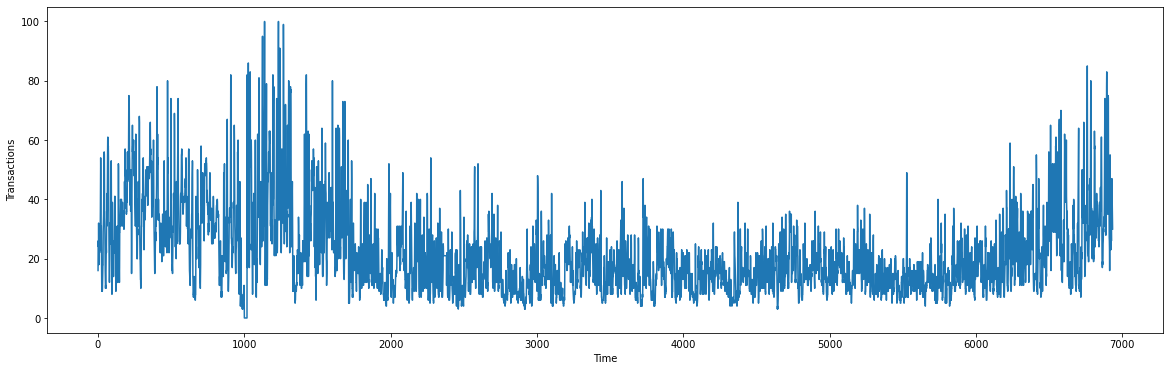

In [4]:
plt.figure(figsize = (20, 6))
plt.xlabel("Time")
plt.ylabel("Transactions")

plt.plot(series)
plt.show()

### How to prepare the data for the neural network. 

<img src = "img/Multistep.png" alt="Girl in a jacket" width="600" height="800">

In [5]:
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
         # find the end of this pattern
         end_ix = i + n_steps_in
         out_end_ix = end_ix + n_steps_out
         # check if we are beyond the sequence
         if out_end_ix > len(sequence):
             break
         # gather input and output parts of the pattern
         seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
         X.append(seq_x)
         y.append(seq_y)
    return np.array(X), np.array(y)

In [6]:
# choose a number of time steps
n_steps_in, n_steps_out = 24,24

# split into samples
X, y = split_sequence(series, n_steps_in, n_steps_out)
count = 0
for i in range(len(X)):
    print(series[i],X[i], y[i])
    count +=1
    if count>7: break

16.0 [16. 26. 25. 24. 32. 21. 18. 26. 29. 29. 22. 23. 27. 24. 23. 28. 36. 49.
 54. 48. 32. 26. 31. 23.] [14. 12.  9. 11.  9.  9. 10. 14. 15. 18. 18. 29. 31. 33. 35. 40. 46. 51.
 56. 55. 42. 34. 32. 28.]
26.0 [26. 25. 24. 32. 21. 18. 26. 29. 29. 22. 23. 27. 24. 23. 28. 36. 49. 54.
 48. 32. 26. 31. 23. 14.] [12.  9. 11.  9.  9. 10. 14. 15. 18. 18. 29. 31. 33. 35. 40. 46. 51. 56.
 55. 42. 34. 32. 28. 20.]
25.0 [25. 24. 32. 21. 18. 26. 29. 29. 22. 23. 27. 24. 23. 28. 36. 49. 54. 48.
 32. 26. 31. 23. 14. 12.] [ 9. 11.  9.  9. 10. 14. 15. 18. 18. 29. 31. 33. 35. 40. 46. 51. 56. 55.
 42. 34. 32. 28. 20. 16.]
24.0 [24. 32. 21. 18. 26. 29. 29. 22. 23. 27. 24. 23. 28. 36. 49. 54. 48. 32.
 26. 31. 23. 14. 12.  9.] [11.  9.  9. 10. 14. 15. 18. 18. 29. 31. 33. 35. 40. 46. 51. 56. 55. 42.
 34. 32. 28. 20. 16. 12.]
32.0 [32. 21. 18. 26. 29. 29. 22. 23. 27. 24. 23. 28. 36. 49. 54. 48. 32. 26.
 31. 23. 14. 12.  9. 11.] [ 9.  9. 10. 14. 15. 18. 18. 29. 31. 33. 35. 40. 46. 51. 56. 55. 42. 34.
 32. 28. 20

In [7]:
print(X.shape)
print(y.shape)

(6888, 24)
(6888, 24)


In [8]:
train_size = 800
test_size = 223

train_X, test_X = X[:train_size], X[train_size:] 
train_y, test_y = y[:train_size], y[train_size:]


In [9]:
# define model
model = Sequential()
model.add(Dense(500, activation='relu', input_dim=n_steps_in)) 
model.add(Dense(250, activation='relu', input_dim=n_steps_in)) 
model.add(Dense(n_steps_out))

model.compile(optimizer='adam', loss='mse' , metrics=[metrics.mae])

# fit model
history = model.fit(train_X, train_y, batch_size=128, epochs=250, verbose=2)

Epoch 1/250
7/7 - 0s - loss: 741.7181 - mean_absolute_error: 22.3167
Epoch 2/250
7/7 - 0s - loss: 254.7458 - mean_absolute_error: 12.6868
Epoch 3/250
7/7 - 0s - loss: 201.5101 - mean_absolute_error: 11.3739
Epoch 4/250
7/7 - 0s - loss: 181.8895 - mean_absolute_error: 10.7243
Epoch 5/250
7/7 - 0s - loss: 167.4204 - mean_absolute_error: 10.2957
Epoch 6/250
7/7 - 0s - loss: 160.5623 - mean_absolute_error: 10.0376
Epoch 7/250
7/7 - 0s - loss: 155.1455 - mean_absolute_error: 9.7969
Epoch 8/250
7/7 - 0s - loss: 151.5000 - mean_absolute_error: 9.6536
Epoch 9/250
7/7 - 0s - loss: 149.5069 - mean_absolute_error: 9.6222
Epoch 10/250
7/7 - 0s - loss: 146.5774 - mean_absolute_error: 9.4685
Epoch 11/250
7/7 - 0s - loss: 145.0457 - mean_absolute_error: 9.4706
Epoch 12/250
7/7 - 0s - loss: 146.0086 - mean_absolute_error: 9.3817
Epoch 13/250
7/7 - 0s - loss: 142.0619 - mean_absolute_error: 9.3487
Epoch 14/250
7/7 - 0s - loss: 141.7866 - mean_absolute_error: 9.2368
Epoch 15/250
7/7 - 0s - loss: 139.645

Epoch 120/250
7/7 - 0s - loss: 84.0126 - mean_absolute_error: 7.0346
Epoch 121/250
7/7 - 0s - loss: 82.6513 - mean_absolute_error: 6.9850
Epoch 122/250
7/7 - 0s - loss: 81.4305 - mean_absolute_error: 6.8933
Epoch 123/250
7/7 - 0s - loss: 80.4706 - mean_absolute_error: 6.8817
Epoch 124/250
7/7 - 0s - loss: 79.9588 - mean_absolute_error: 6.8442
Epoch 125/250
7/7 - 0s - loss: 79.2781 - mean_absolute_error: 6.8002
Epoch 126/250
7/7 - 0s - loss: 78.7835 - mean_absolute_error: 6.7990
Epoch 127/250
7/7 - 0s - loss: 78.6657 - mean_absolute_error: 6.7864
Epoch 128/250
7/7 - 0s - loss: 78.0119 - mean_absolute_error: 6.7606
Epoch 129/250
7/7 - 0s - loss: 78.2525 - mean_absolute_error: 6.7630
Epoch 130/250
7/7 - 0s - loss: 78.4633 - mean_absolute_error: 6.7590
Epoch 131/250
7/7 - 0s - loss: 76.7296 - mean_absolute_error: 6.6873
Epoch 132/250
7/7 - 0s - loss: 76.1247 - mean_absolute_error: 6.6873
Epoch 133/250
7/7 - 0s - loss: 75.5059 - mean_absolute_error: 6.6431
Epoch 134/250
7/7 - 0s - loss: 78.

Epoch 239/250
7/7 - 0s - loss: 44.5994 - mean_absolute_error: 5.0104
Epoch 240/250
7/7 - 0s - loss: 45.1642 - mean_absolute_error: 5.0629
Epoch 241/250
7/7 - 0s - loss: 45.0222 - mean_absolute_error: 5.0153
Epoch 242/250
7/7 - 0s - loss: 45.4490 - mean_absolute_error: 5.0625
Epoch 243/250
7/7 - 0s - loss: 45.3040 - mean_absolute_error: 5.0503
Epoch 244/250
7/7 - 0s - loss: 45.8452 - mean_absolute_error: 5.1163
Epoch 245/250
7/7 - 0s - loss: 44.9853 - mean_absolute_error: 5.0365
Epoch 246/250
7/7 - 0s - loss: 46.6571 - mean_absolute_error: 5.1705
Epoch 247/250
7/7 - 0s - loss: 47.3206 - mean_absolute_error: 5.1933
Epoch 248/250
7/7 - 0s - loss: 45.5163 - mean_absolute_error: 5.0712
Epoch 249/250
7/7 - 0s - loss: 44.6121 - mean_absolute_error: 5.0262
Epoch 250/250
7/7 - 0s - loss: 44.0721 - mean_absolute_error: 4.9871


In [10]:
history.history

{'loss': [741.7181396484375,
  254.74581909179688,
  201.51011657714844,
  181.88949584960938,
  167.42039489746094,
  160.56231689453125,
  155.1454620361328,
  151.49996948242188,
  149.50689697265625,
  146.5774383544922,
  145.04571533203125,
  146.00863647460938,
  142.0619354248047,
  141.7865753173828,
  139.64576721191406,
  138.65481567382812,
  138.36932373046875,
  136.18858337402344,
  135.6181182861328,
  135.48399353027344,
  135.2721405029297,
  134.19720458984375,
  132.48956298828125,
  131.36407470703125,
  133.74554443359375,
  130.61647033691406,
  129.79466247558594,
  130.6956024169922,
  128.22581481933594,
  127.67683410644531,
  128.23390197753906,
  126.84333038330078,
  125.66592407226562,
  124.9472427368164,
  126.95140838623047,
  126.60537719726562,
  124.20308685302734,
  124.31668090820312,
  124.0433578491211,
  123.68754577636719,
  122.56494140625,
  120.38311767578125,
  119.80890655517578,
  119.32292175292969,
  119.03087615966797,
  120.727531433

### Monitor the training process to avoid overfitting of the model.  

- The neural network may learn the data so well that its learning goes into overfitting. 

- To prevent this, you should monitor the training process 

- The curve of validation should follow the curve of training otherwise you should stop the training with EarlyStop.

- The parameters of the model (like number of levels, number of neurons per level, optimizer function etc..) are not optimized 

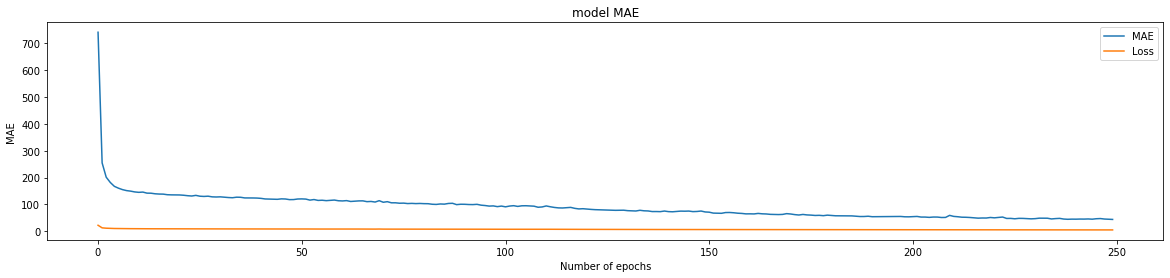

In [11]:
plt.figure(figsize = (20, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_error'])
plt.title('model MAE')
plt.ylabel('MAE ')
plt.xlabel('Number of epochs')
plt.legend(["MAE", "Loss"], loc ="upper right")
plt.show()

### Show the first prediction 

In [12]:
# the number of elements inside numpy array should be the same as n_steps_in
x_input = np.array([ 16., 26. ,25., 24., 32. ,21., 18., 26., 29., 29., 22. ,23. ,27., 24. ,23., 28. ,36., 49.,
 54., 48., 32. ,26., 31., 23.])

In [13]:
# transform and predict.
x_input = x_input.reshape((1, n_steps_in))
yhat = model.predict(x_input, verbose=2)
print(yhat[0])

#12 25 28  4 15  1  6 24  6  2  6 16  5  4  9 15  3  2 20 12 15  8  8  8  4 13  9 12 15 11

1/1 - 0s
[16.734524  16.6777    16.430582  15.089912  14.6290455 17.43915
 17.520864  19.338425  22.18015   24.520079  22.860258  26.598026
 29.877539  28.774975  30.135883  33.789566  43.994816  50.96575
 53.488438  50.03595   41.4762    37.97659   33.628197  28.436195 ]


In [14]:
# predict and compute error
expected = test_y
predicted = []
for i in range(len(test_X)):
    x_input = test_X[i].reshape((1, n_steps_in)) # + 1 per la nuova feature aggiunta
    yhat = model.predict(x_input, verbose=0)
  
    predicted.append(np.around(yhat[0], decimals=1)) 

<class 'numpy.ndarray'>
6088 24


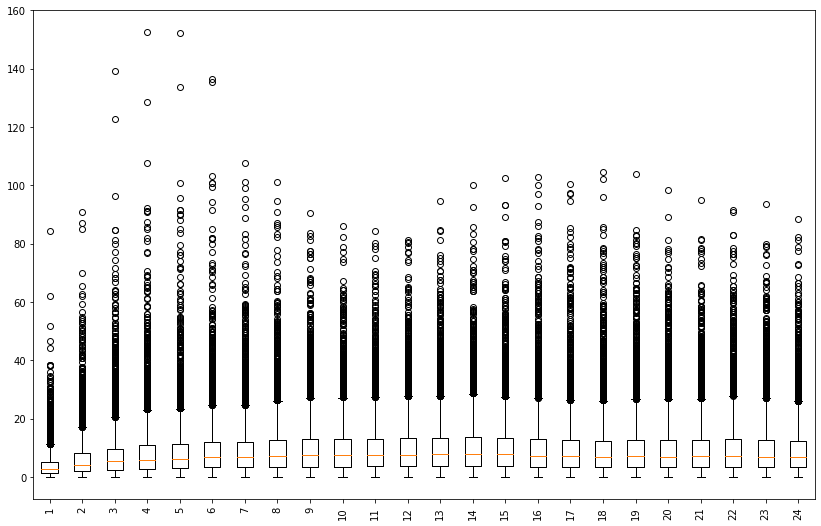

In [15]:
difference = abs(expected - predicted)
print(type(difference))
print(difference.shape[0], difference.shape[1])

# comment line below to see all the boxplots for every number of steps from 1 to n_steps_out
#difference =  np.reshape(difference, difference.shape[0] * difference.shape[1])

plt.figure(figsize = (14, 9))
#plt.boxplot(one_cell['nr_people'].values, vert = False)
plt.boxplot(difference, vert= True);
plt.xticks( rotation='vertical')
plt.show()

### Compute the forecasting Error

Mean error 9.158342916238146


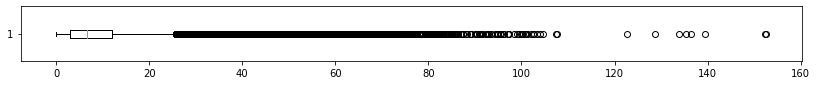

In [16]:
mean_error =  np.reshape(difference, difference.shape[0] * difference.shape[1])
print('Mean error', np.mean(mean_error))
plt.figure(figsize = (14,1))
plt.boxplot(mean_error, vert= False);
plt.show()